In [77]:
%matplotlib inline

In [38]:
import numpy as np
from numpy.linalg import norm

In [91]:
import gzip
words = []
vectors = []

for l in gzip.open("../../HW2/data/glove.6B.50d.txt.gz"):
    t = l.strip().split()
    words.append(t[0].decode())
    vectors.append(list(map(float, t[1:])))


In [30]:
wordvecs = np.array(vectors, dtype=np.double)

In [14]:
word2id = {word.decode():i for i, word in enumerate(words)}

In [18]:
word2id["athens"]

3264

In [34]:
wordvecs[word2id["athens"]]

array([-0.080518 ,  1.0627   ,  0.14356  ,  0.51284  , -0.86614  ,
       -0.87747  , -0.081332 ,  0.62346  , -1.0791   , -0.26803  ,
        0.042063 , -1.1343   , -0.41609  , -0.44612  ,  0.75472  ,
        0.39791  ,  0.26783  ,  0.60382  , -1.1654   ,  0.2434   ,
        0.65747  , -0.089722 , -1.0805   ,  0.016183 ,  0.5644   ,
       -1.4807   ,  0.26113  , -0.0033073, -1.0285   , -0.34615  ,
        1.4185   ,  0.80099  , -0.24248  , -0.45811  , -0.030437 ,
        0.17815  ,  0.83084  ,  0.14041  , -0.14673  ,  0.35092  ,
       -0.46702  , -0.22738  ,  0.71731  , -0.29418  ,  0.35399  ,
        0.34459  , -0.27677  ,  0.56476  ,  0.75872  , -1.3752   ])

In [187]:
def nearest(vec, dot=False):
    vnorm = norm(vec)
    scores = []
    for i in range(len(words)):
        wvnorm = norm(wordvecs[i])
        if not dot:
            scores.append(np.dot(wordvecs[i], vec) / (vnorm * wvnorm))
        else:
            scores.append(np.dot(wordvecs[i], vec))
    score_ids = [(s, i) for i, s in enumerate(scores)]
    score_ids.sort()
    score_ids.reverse()
    return score_ids

In [49]:
closests = nearest(wordvecs[word2id["athens"]])


In [62]:
def print_nbest(closests):
    for score, i in closests[:20]:
        print("%s\t%s"%(words[i],score))
print_nbest(closests)

athens	1.0
thessaloniki	0.753296458117
budapest	0.742295923743
bucharest	0.722721107685
istanbul	0.719985596814
greece	0.717178243637
beijing	0.709548054231
seoul	0.697987992237
piraeus	0.690471084596
sydney	0.688954838558
olympics	0.680529514873
acropolis	0.679410595032
prague	0.676343476106
moscow	0.673589430159
olympic	0.671738212512
stockholm	0.670935083049
saturday	0.665605450439
osaka	0.658451341105
canberra	0.658331596849
tokyo	0.657494372951


In [57]:
def analogy_vec(a, b, c):
    return wordvecs[word2id[b]] - wordvecs[word2id[a]] + wordvecs[word2id[c]]

In [65]:
d = analogy_vec("king", "queen", "man")
print_nbest(nearest(d))

woman	0.890391411363
girl	0.845372614633
man	0.830175760255
her	0.784583150851
boy	0.776306631882
she	0.761976437856
herself	0.759762826224
blind	0.729675545545
mother	0.72303401112
blonde	0.71361435474
stranger	0.700963837999
girls	0.700380292013
girlfriend	0.698242571648
old	0.696897035117
lover	0.696171105665
eyes	0.693559953437
young	0.693181590172
female	0.692087983551
teenager	0.688937080658
blond	0.688488957526


In [66]:
d = analogy_vec("athens", "greece", "oslo")
print_nbest(nearest(d))

oslo	0.800940880805
norway	0.724581222223
cyprus	0.710603502924
accord	0.67236605952
iceland	0.669985509136
pact	0.668983334486
accords	0.66773110168
palestine	0.666339553777
brokered	0.656774460813
agreement	0.654591264655
norwegian	0.65360254298
treaty	0.642123535162
ankara	0.641830299428
copenhagen	0.632054092737
greece	0.631164428988
malta	0.628695581307
cypriots	0.628685760459
accession	0.62584522837
plo	0.624709159735
baltic	0.61372345483


In [92]:
to_show = [w.lower() for w in ["london", "england",
"Athens", "Greece",
"Berlin","Germany",
"Madrid","Spain",
"Rome","Italy",
"Paris","France",
"Bucharest", "Romania",
"Budapest", "Hungary",
"Vienna", "Austria",
"Warsaw", "Poland"]]

to_show_vecs = [wordvecs[word2id[w]] for w in to_show ]



In [181]:
to_show = [w.lower() for w in ["woods", "golf",
"agassi", "tennis",
"bonds","baseball",
"manning", "football",
"gretzky","hockey",
"jordan","basketball"
]]

to_show_vecs = [wordvecs[word2id[w]] for w in to_show ]


In [71]:
a = np.array(a)

In [182]:
import sklearn.decomposition
t = sklearn.decomposition.PCA(2)
X_pca = t.fit_transform(to_show_vecs)

In [82]:
import matplotlib.pyplot as plt
from matplotlib import offsetbox

In [183]:
def plot_embedding(X, words, title=None, size=(3,3)):
    x_min, x_max = np.min(X, 0), np.max(X, 0)
    X = (X - x_min) / (x_max - x_min)

    plt.figure(figsize=size)
    ax = plt.subplot(111)
    ids = {}
    

    for i in range(X.shape[0]):
        letter = words[i]
        ax.plot(X[i, 0], X[i, 1],".")
        ax.annotate(letter, (X[i, 0], X[i, 1]), fontsize=30) 
        if i % 2 == 0:
            ax.plot((X[i,0], X[i+1,0]), (X[i,1], X[i+1,1]))           

    plt.xticks([]), plt.yticks([])
    plt.axis('off')
    
    if title is not None:
        plt.title(title)
    plt.subplots_adjust(left=-0.2, right=1.2, top=1.2, bottom=-0.2)
    #plt.savefig("linear.png", dpi=100)

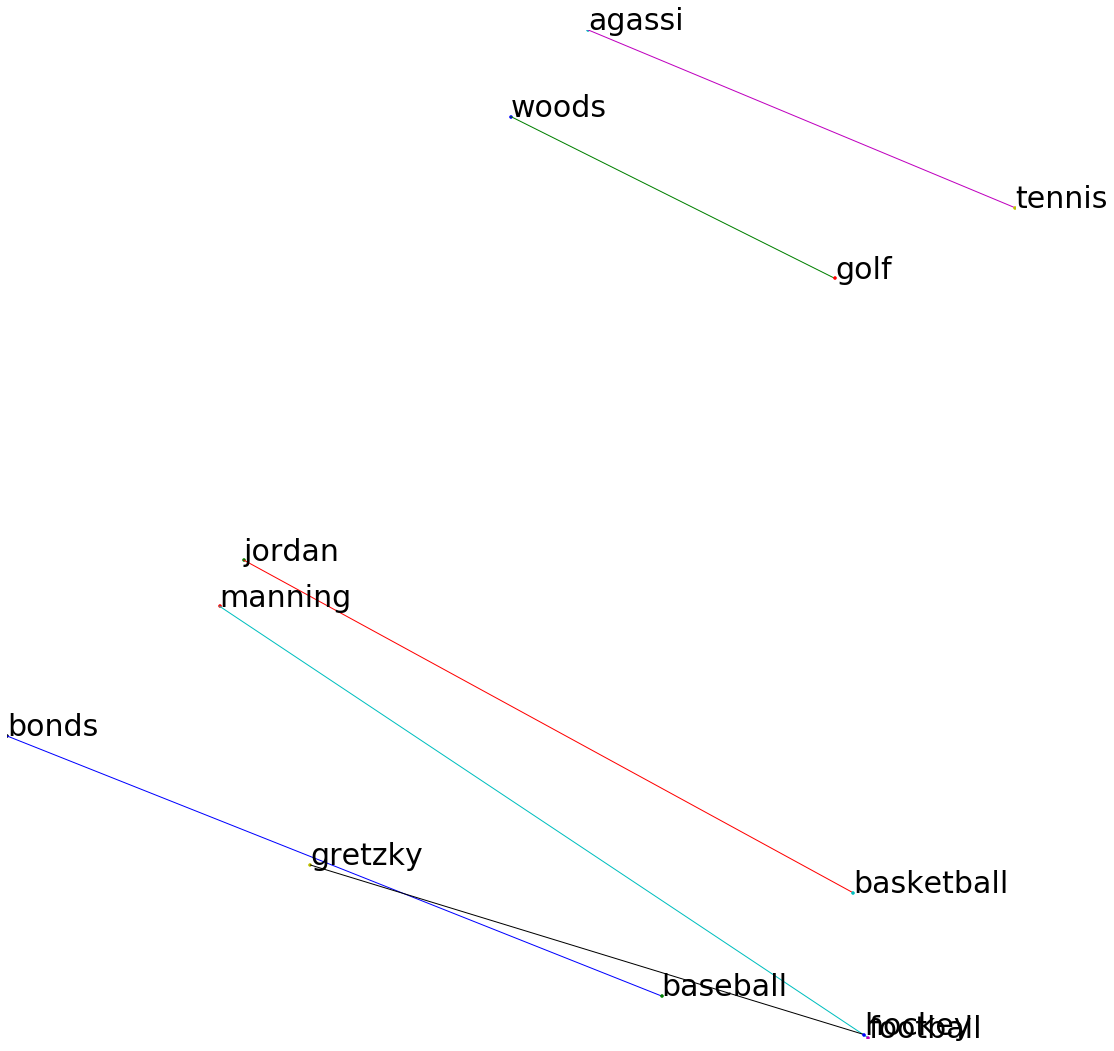

In [184]:
plot_embedding(X_pca, to_show, size=(10,10))

In [196]:
print_nbest(nearest(wordvecs[word2id["dog"]]))

dog	1.0
cat	0.921800527377
dogs	0.851315870426
horse	0.790758298322
puppy	0.775492121034
pet	0.772470734611
rabbit	0.772081457265
pig	0.749006160038
snake	0.73991884888
baby	0.739557028388
bite	0.738793700816
boy	0.738279946925
cats	0.729978577748
animal	0.725225523734
monkey	0.724720695005
rat	0.724584645395
mad	0.724435488352
crazy	0.71579957911
man	0.712192558413
elephant	0.711762229805


In [193]:
print_nbest(nearest(wordvecs[word2id["schnauzer"]], dot=True))

schnauzer	27.3711839224
kongra	20.4476052286
danyon	19.8920503309
salticidae	19.7934692784
gracillariidae	19.5084371554
schnauzers	19.4232667473
pinscher	19.1979447831
powerbook	18.9056835719
interservices	18.5865673921
xiulian	18.5051691808
8-gigabyte	18.4277818727
kampi	18.2712090148
lzr	18.2151542224
poodle	18.1942714519
set-50	18.1912160839
excluder	18.1047355801
33-stock	17.6907751353
four-stroke	17.6800107534
powerpc	17.591939294
cologne-frankfurt	17.544736007
